# Spiral Experiment

We will perform the sphere reconstruction process with spiral data-generating process

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '..'))

import torch

from data.generation import SpiralRotation, Patches
from visualization_utils.spheres import visualize_spheres_side_by_side, scatter3d_sphere
from encoders import SphericalEncoder

from encoders import get_mlp

import matplotlib.pyplot as plt
from simclr.simclr import SimCLR
from spaces import NSphereSpace

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using', device)

Using cpu


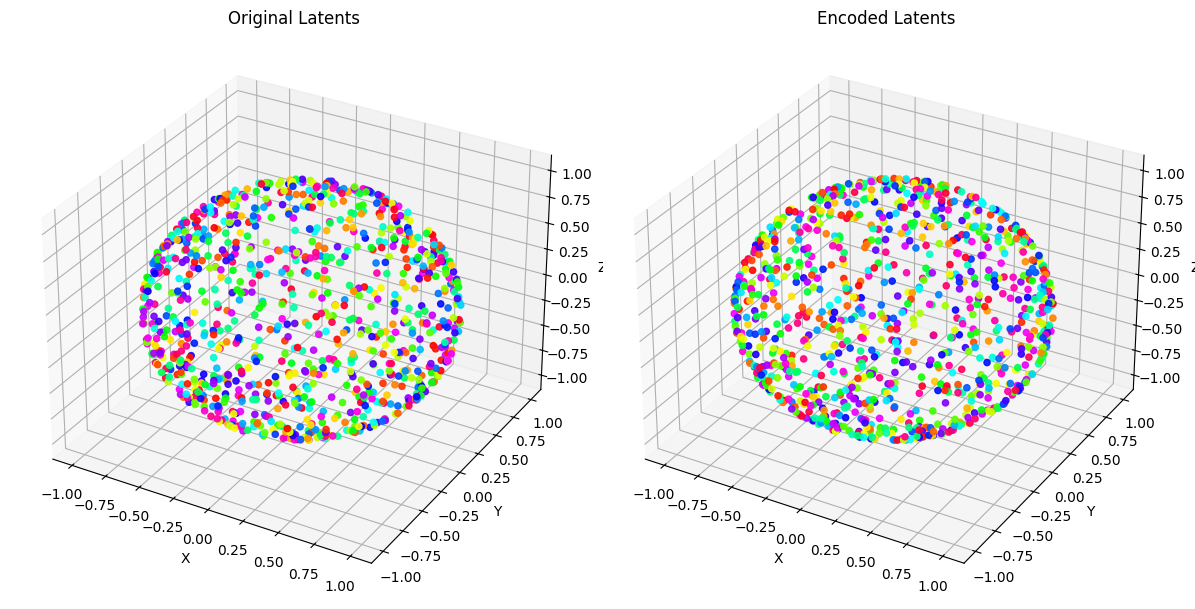

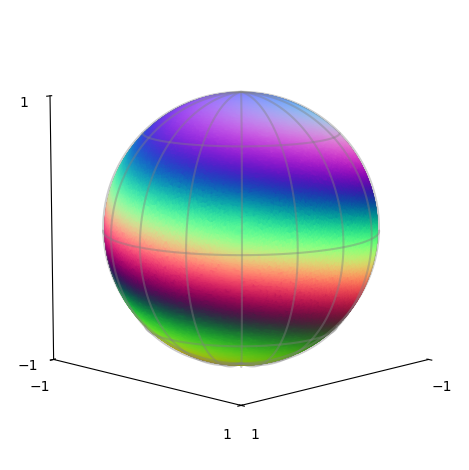

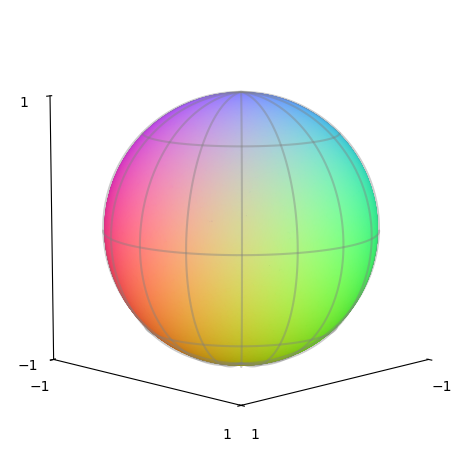

In [3]:
sphere = NSphereSpace(3)
g_spiral = SpiralRotation(2)

z = sphere.uniform(1000)

visualize_spheres_side_by_side(plt, z, g_spiral(z))

z = sphere.uniform(100000)
fig = scatter3d_sphere(plt, z, g_spiral(z), s=10, a=.8)
fig = scatter3d_sphere(plt, z, z, s=10, a=.8)

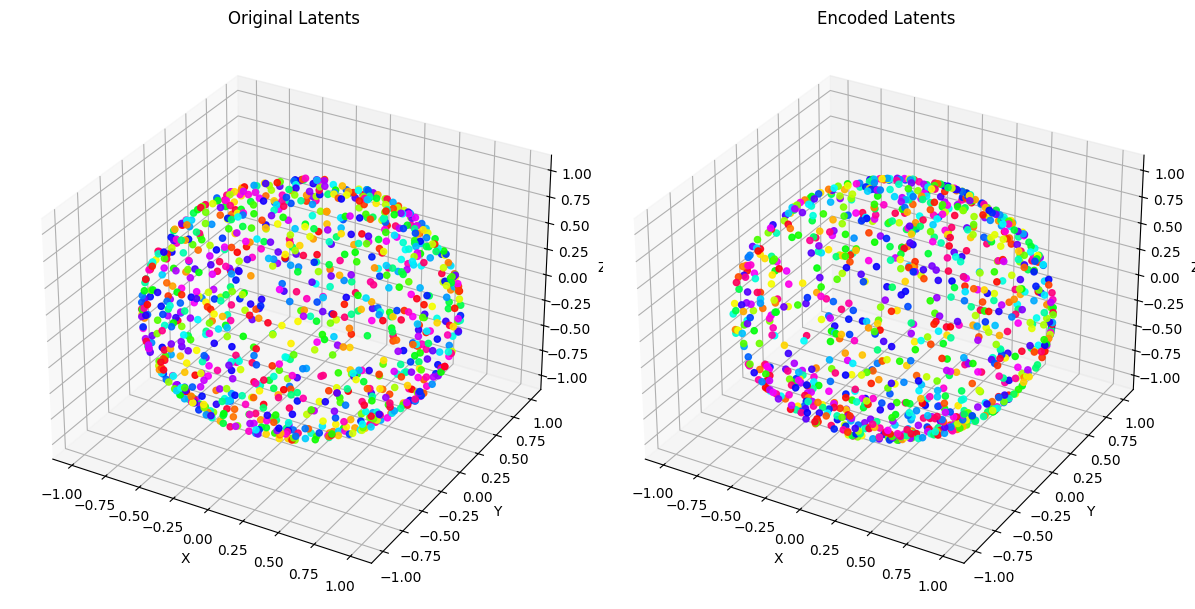

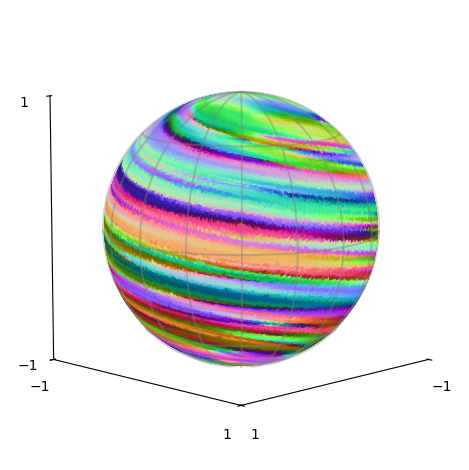

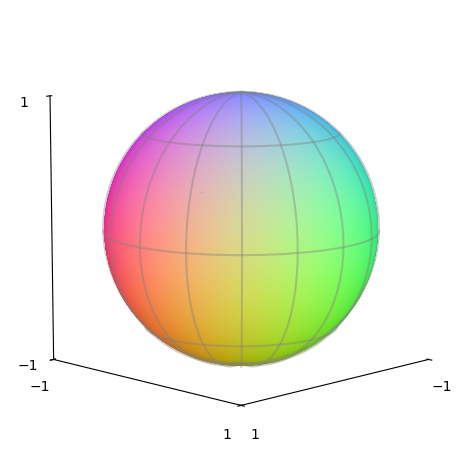

In [4]:
tau = 0.3
kappa = 1 / tau

iterations = 10000
batch = 6144

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

f = SphericalEncoder(hidden_dims=[128, 256, 256, 256, 256, 256, 256, 128])

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000)
z_enc = h(z)

# Add coloring corresponding to initial points

visualize_spheres_side_by_side(plt, z, z_enc)

z = sphere.uniform(100000).to(device)
z_enc = h(z.cpu())

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)

/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Linear control score: 1.0
Permutation control score: 1.0


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.848213195800781 Pos Loss: -2.310885429382324 Neg Loss: 10.159098625183105 Samples processed: 1 linear disentanglement: 0.9948627352714539 permutation disentanglement: 0.8198550565555793 angle_preservation_error: 0.02254040725529194


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.831052303314209 Pos Loss: -2.328066110610962 Neg Loss: 10.15911865234375 Samples processed: 21 linear disentanglement: 0.9951655268669128 permutation disentanglement: 0.8214543035821115 angle_preservation_error: 0.021406522020697594


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.825279235839844 Pos Loss: -2.3337113857269287 Neg Loss: 10.158989906311035 Samples processed: 41 linear disentanglement: 0.9955954551696777 permutation disentanglement: 0.8279251447413256 angle_preservation_error: 0.020199723541736603


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.822200775146484 Pos Loss: -2.336946487426758 Neg Loss: 10.159148216247559 Samples processed: 61 linear disentanglement: 0.9954095482826233 permutation disentanglement: 0.8151767106390885 angle_preservation_error: 0.020689986646175385


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.8160858154296875 Pos Loss: -2.3428397178649902 Neg Loss: 10.15892505645752 Samples processed: 81 linear disentanglement: 0.9957860112190247 permutation disentanglement: 0.827209829309074 angle_preservation_error: 0.02029176987707615


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.836158752441406 Pos Loss: -2.3230628967285156 Neg Loss: 10.159221649169922 Samples processed: 101 linear disentanglement: 0.9950253963470459 permutation disentanglement: 0.8326901481335399 angle_preservation_error: 0.022025752812623978


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.8265557289123535 Pos Loss: -2.332412004470825 Neg Loss: 10.158968925476074 Samples processed: 121 linear disentanglement: 0.9959760308265686 permutation disentanglement: 0.8329847512071206 angle_preservation_error: 0.018643110990524292


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.827521800994873 Pos Loss: -2.3314425945281982 Neg Loss: 10.158965110778809 Samples processed: 141 linear disentanglement: 0.9968221783638 permutation disentanglement: 0.8215509447428353 angle_preservation_error: 0.01769528165459633


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.825002193450928 Pos Loss: -2.333940029144287 Neg Loss: 10.158941268920898 Samples processed: 161 linear disentanglement: 0.9958410263061523 permutation disentanglement: 0.8306373623885995 angle_preservation_error: 0.019951118156313896


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.827005863189697 Pos Loss: -2.331908702850342 Neg Loss: 10.158915519714355 Samples processed: 181 linear disentanglement: 0.9960921406745911 permutation disentanglement: 0.8235463397677304 angle_preservation_error: 0.019350269809365273


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.836736679077148 Pos Loss: -2.3222482204437256 Neg Loss: 10.158985137939453 Samples processed: 201 linear disentanglement: 0.9970412850379944 permutation disentanglement: 0.835999709274858 angle_preservation_error: 0.017362408339977264


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.835938930511475 Pos Loss: -2.3230512142181396 Neg Loss: 10.158989906311035 Samples processed: 221 linear disentanglement: 0.9966704845428467 permutation disentanglement: 0.8325751400582426 angle_preservation_error: 0.017741577699780464


/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:290: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: divide by zero encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: RuntimeWarning: overflow encountered in matmul
  Thz = hz @ T
/Users/justin/Desktop/ML_research/CLTheory/experiments/../evals/disentanglement.py:150: R

Loss: 7.830403804779053 Pos Loss: -2.3285834789276123 Neg Loss: 10.158987998962402 Samples processed: 241 linear disentanglement: 0.996367871761322 permutation disentanglement: 0.8311204112414039 angle_preservation_error: 0.018636591732501984


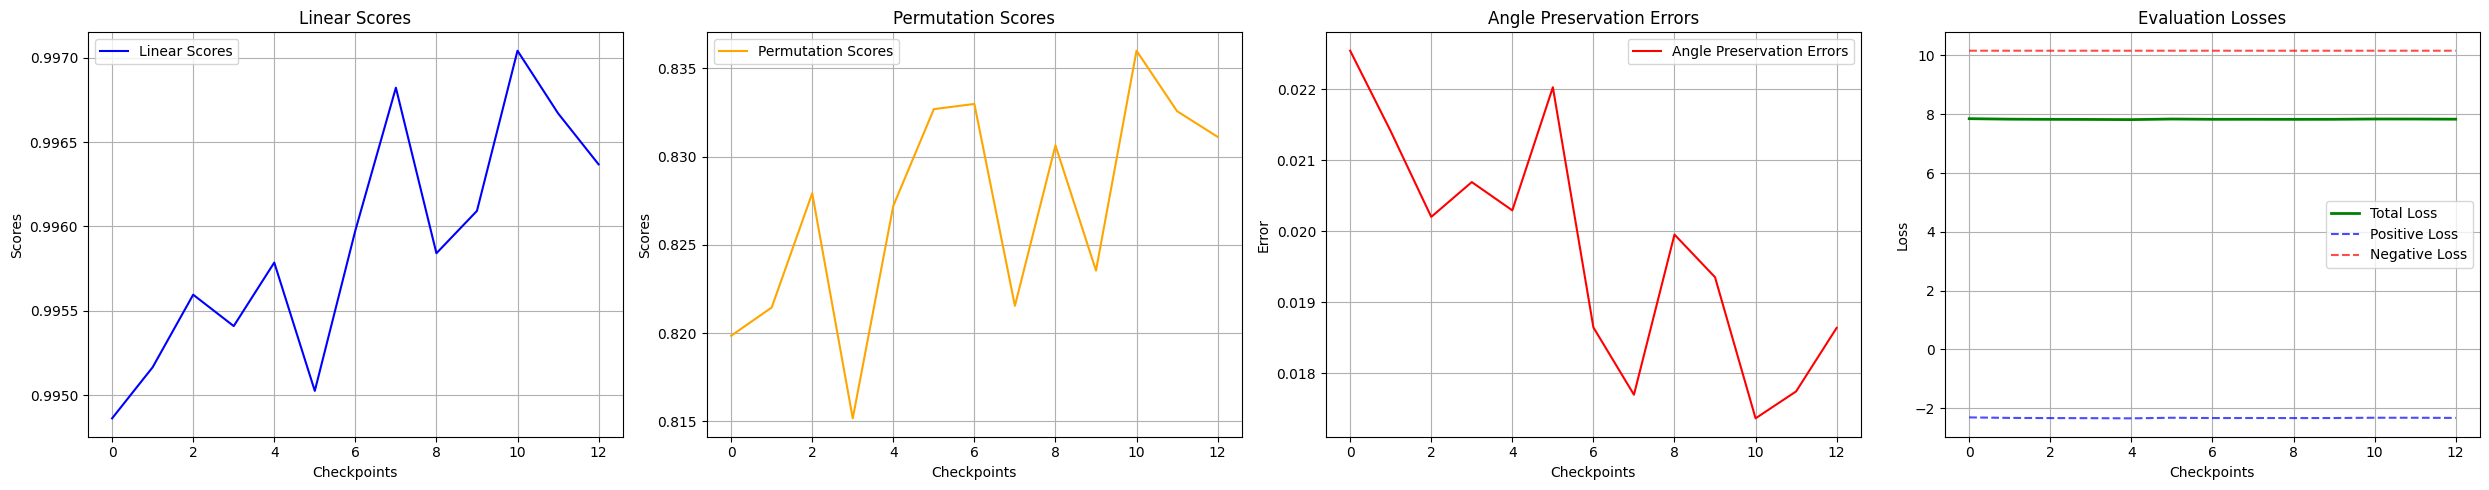

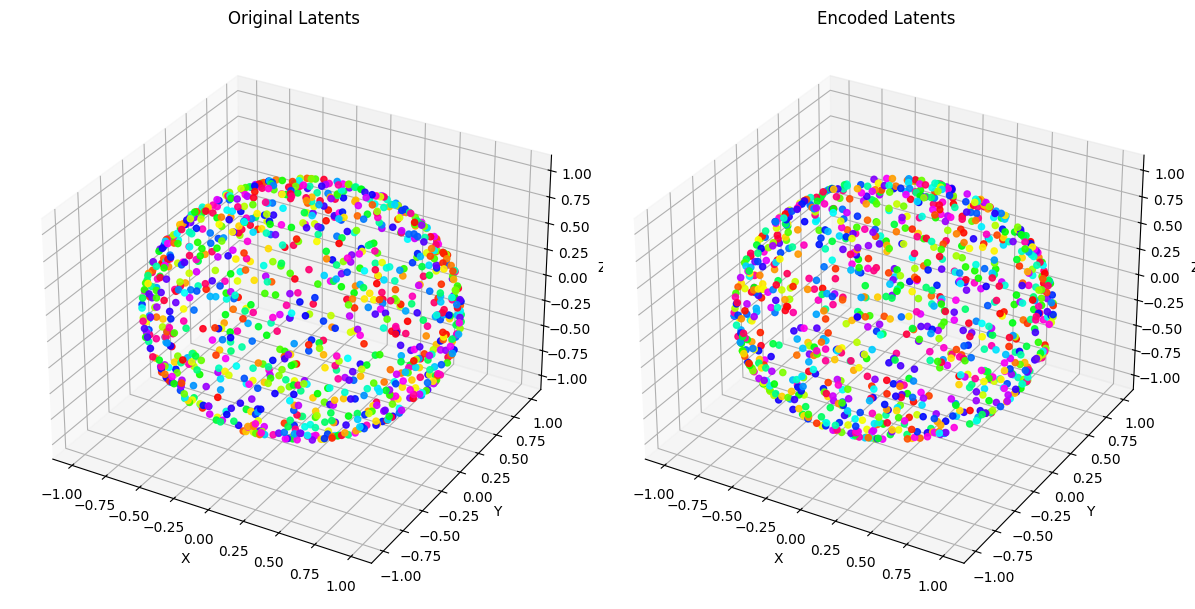

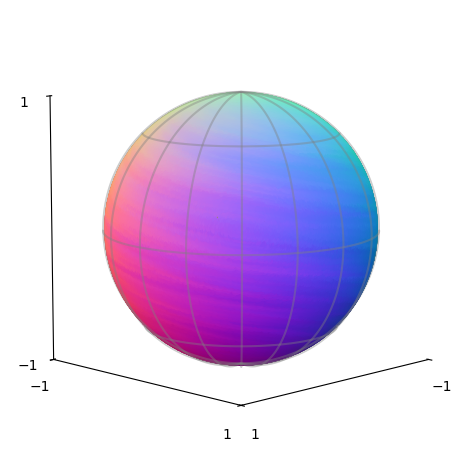

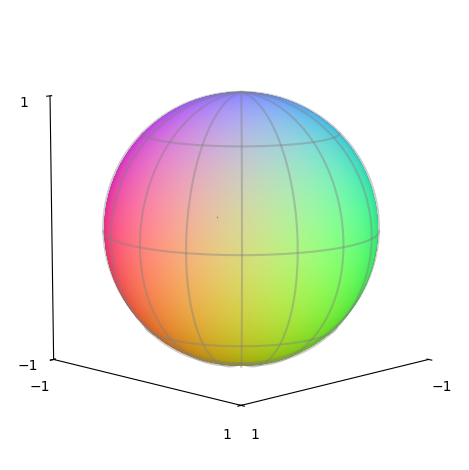

In [6]:
from visualization_utils.scoring import plot_scores

iterations = 250

simclr_vmf = SimCLR(
    f, g_spiral, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f, scores = simclr_vmf.train(batch, iterations)

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

z = sphere.uniform(100000).to(device)
z_enc = h(z).to(device)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)

In [ ]:
from experiment_utils.linear import linear_unrotation

z_unrotated = linear_unrotation(z, z_enc)

fig = scatter3d_sphere(plt, z.cpu(), z_unrotated, s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10, a=0.8)

Linear control score: 1.0
Permutation control score: 0.9999999999999997
Loss: 7.822644233703613 Samples processed: 1 linear disentanglement: 0.9960508942604065 permutation disentanglement: 0.028035541996359825 angle_preservation_error: 0.01823432184755802
Loss: 7.821956634521484 Samples processed: 21 linear disentanglement: 0.9973752498626709 permutation disentanglement: 0.03252984955906868 angle_preservation_error: 0.015620142221450806
Loss: 7.833366394042969 Samples processed: 41 linear disentanglement: 0.9978201985359192 permutation disentanglement: 0.0285580363124609 angle_preservation_error: 0.014212029054760933
Loss: 7.8087615966796875 Samples processed: 61 linear disentanglement: 0.9975497126579285 permutation disentanglement: 0.030850470066070557 angle_preservation_error: 0.014778347685933113
Loss: 7.795361518859863 Samples processed: 81 linear disentanglement: 0.9972346425056458 permutation disentanglement: 0.02758546732366085 angle_preservation_error: 0.01639886014163494
Loss

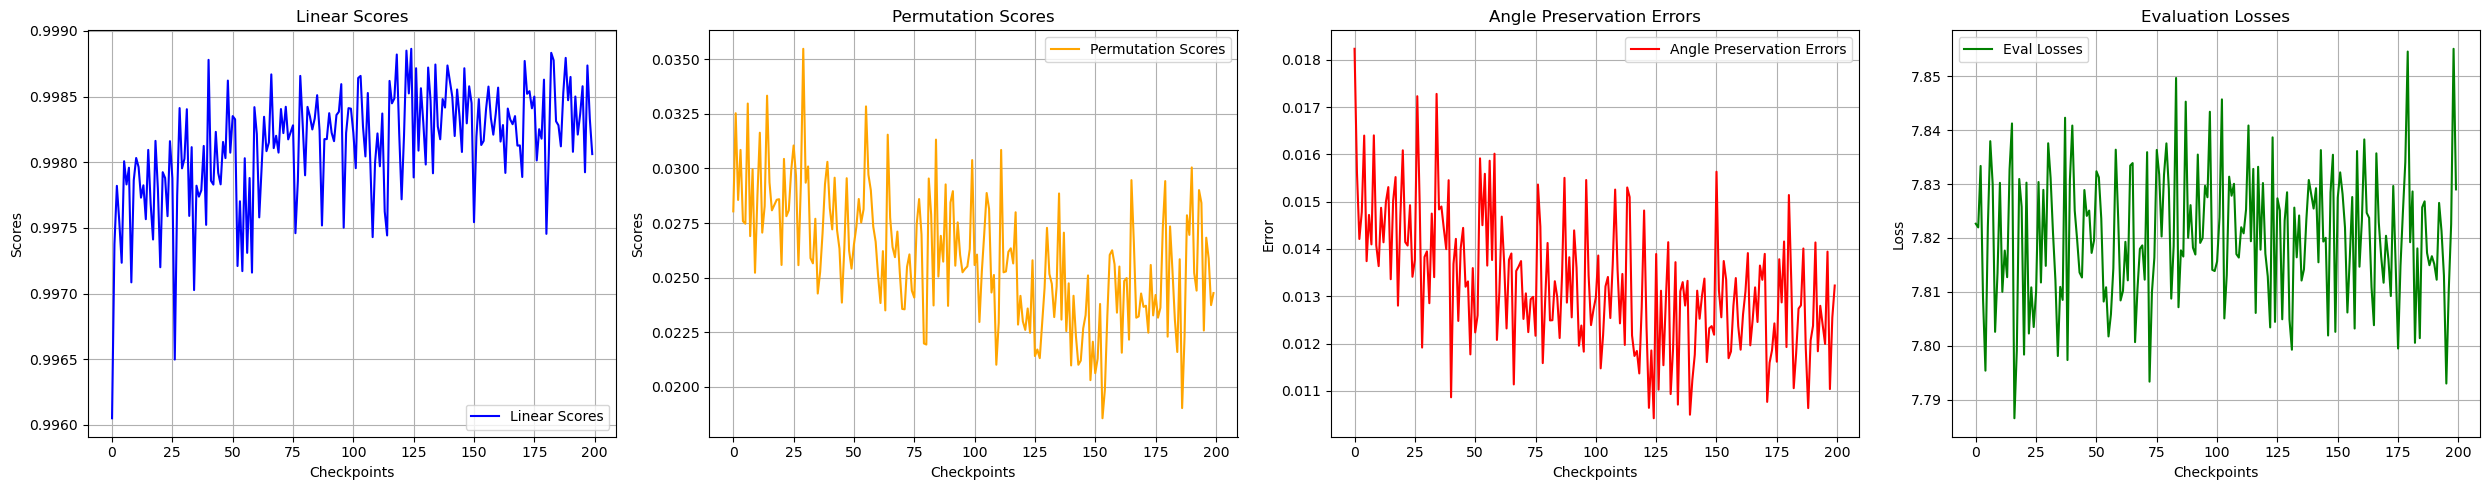

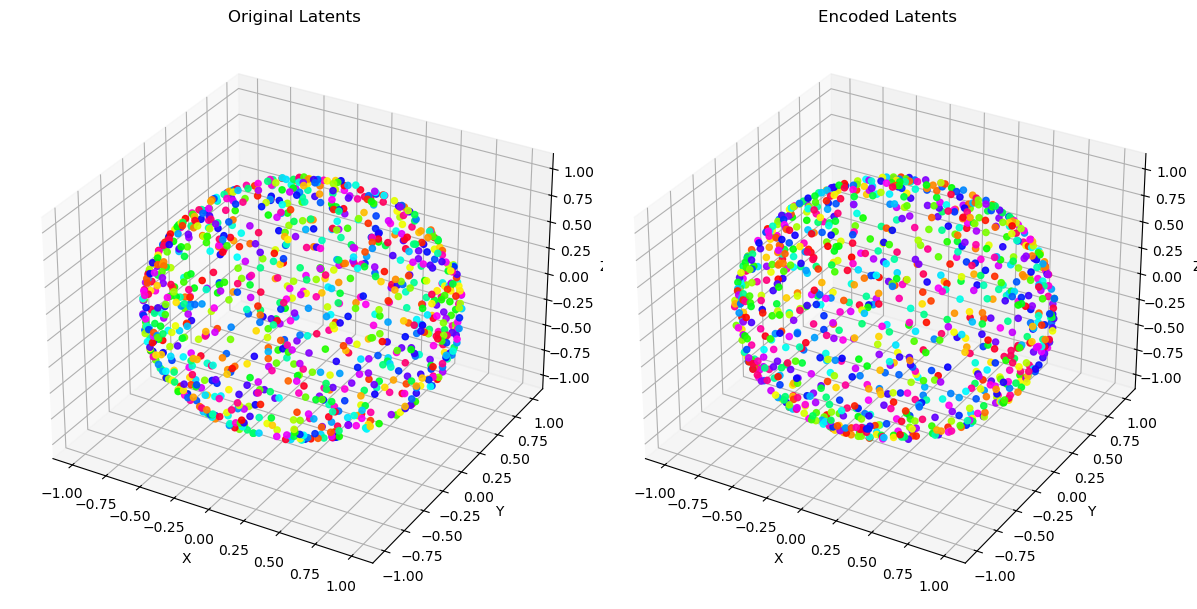

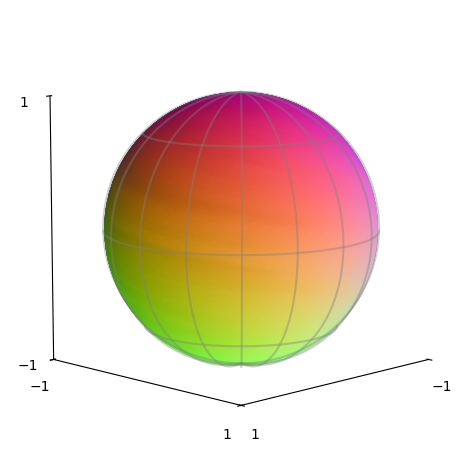

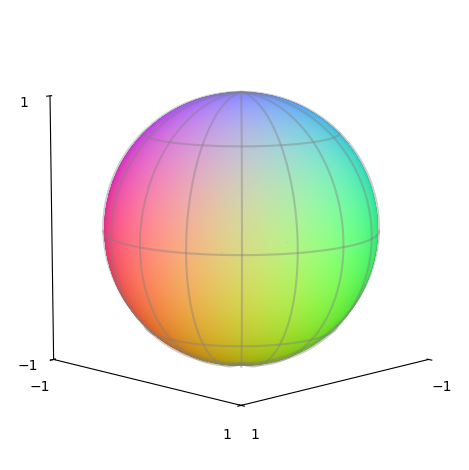

In [5]:
from torch import nn
from encoders import InverseSpiralEncoder


simclr_biased = SimCLR(
    InverseSpiralEncoder(3, 3, 2), g_spiral, sample_pair_fixed, sample_uniform_fixed, tau, device
)

f, scores = simclr_vmf.train(batch, iterations)

h = lambda z: f(g_spiral(z))

z = sphere.uniform(1000).to(device)
z_enc = h(z).to(device)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

z = sphere.uniform(100000).to(device)
z_enc = h(z).to(device)

fig = scatter3d_sphere(plt, z.cpu(), z_enc.cpu(), s=10, a=.8)
fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10,a=0.8)